In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random
from PIL import Image
%matplotlib inline


In [6]:
def get_image_paths(base_path, split, class_name):
    """Get all image paths for a specific class and split."""
    path = Path(base_path) / 'DataSet' / 'DataSet' / split / class_name
    image_paths = [f for f in path.glob('*.png')]
    print(f"Found {len(image_paths)} images in {str(path)}")
    return image_paths

In [7]:
def display_train_test_comparison(base_path):
    """Display one sample from each class for both training and testing sets."""
    classes = ['Normal', 'Mild', 'Moderate', 'Severe']
    
    # Create a figure with subplots with proper spacing
    fig, axes = plt.subplots(len(classes), 2, figsize=(14, 4*len(classes)), 
                            gridspec_kw={'wspace': 0, 'hspace': 0.1})
    fig.suptitle('Training vs Testing Samples Comparison', fontsize=16)
    
    # Set column titles
    axes[0, 0].set_title('Training Set', pad=10)
    axes[0, 1].set_title('Testing Set', pad=10)
    
    for idx, class_name in enumerate(classes):
        try:
            # Get random samples from training and testing sets
            train_paths = get_image_paths(base_path, 'train', class_name)
            test_paths = get_image_paths(base_path, 'test', class_name)
            
            if not train_paths or not test_paths:
                print(f"Warning: No images found for {class_name} in train or test set")
                continue
            
            train_sample = Image.open(random.choice(train_paths))
            test_sample = Image.open(random.choice(test_paths))
            
            # Display images with class labels
            axes[idx, 0].imshow(train_sample)
            axes[idx, 0].set_ylabel(class_name, fontsize=14, fontweight='bold')
            axes[idx, 0].set_xlabel(f"Size: {train_sample.size}", fontsize=10)
            axes[idx, 0].axis('off')
            
            axes[idx, 1].imshow(test_sample)
            axes[idx, 1].set_xlabel(f"Size: {test_sample.size}", fontsize=10)
            axes[idx, 1].axis('off')
            
            # Add row label showing the class
            row_label = fig.text(0.01, axes[idx, 0].get_position().y0 + 
                                 (axes[idx, 0].get_position().height/2),
                                 f"Class: {class_name}", fontsize=12, fontweight='bold',
                                 ha='left', va='center',
                                 bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))
            
        except Exception as e:
            print(f"Error processing {class_name}: {str(e)}")
            continue
    
    plt.subplots_adjust(left=0.15, right=0.95)
    plt.show()

In [8]:
def print_dataset_statistics(base_path):
    """Print the number of images in each class for both splits."""
    classes = ['Normal', 'Mild', 'Moderate', 'Severe']
    splits = ['train', 'test']
    
    for split in splits:
        print(f"\n{split.capitalize()} Set Statistics:")
        print("-" * 20)
        total = 0
        for class_name in classes:
            count = len(get_image_paths(base_path, split, class_name))
            total += count
            print(f"{class_name:10s}: {count:5d} images")
        print(f"{'Total':10s}: {total:5d} images\n")

In [9]:
# Print dataset statistics
print("Dataset Statistics:")
print_dataset_statistics('.')

Dataset Statistics:

Train Set Statistics:
--------------------
Found 3045 images in DataSet/DataSet/train/Normal
Normal    :  3045 images
Found 2864 images in DataSet/DataSet/train/Mild
Mild      :  2864 images
Found 1069 images in DataSet/DataSet/train/Moderate
Moderate  :  1069 images
Found 487 images in DataSet/DataSet/train/Severe
Severe    :   487 images
Total     :  7465 images


Test Set Statistics:
--------------------
Found 361 images in DataSet/DataSet/test/Normal
Normal    :   361 images
Found 311 images in DataSet/DataSet/test/Mild
Mild      :   311 images
Found 188 images in DataSet/DataSet/test/Moderate
Moderate  :   188 images
Found 223 images in DataSet/DataSet/test/Severe
Severe    :   223 images
Total     :  1083 images




Displaying one random sample from each class comparing training and testing sets...
Found 3045 images in DataSet/DataSet/train/Normal
Found 361 images in DataSet/DataSet/test/Normal
Found 2864 images in DataSet/DataSet/train/Mild
Found 311 images in DataSet/DataSet/test/Mild
Found 1069 images in DataSet/DataSet/train/Moderate
Found 188 images in DataSet/DataSet/test/Moderate
Found 487 images in DataSet/DataSet/train/Severe
Found 223 images in DataSet/DataSet/test/Severe


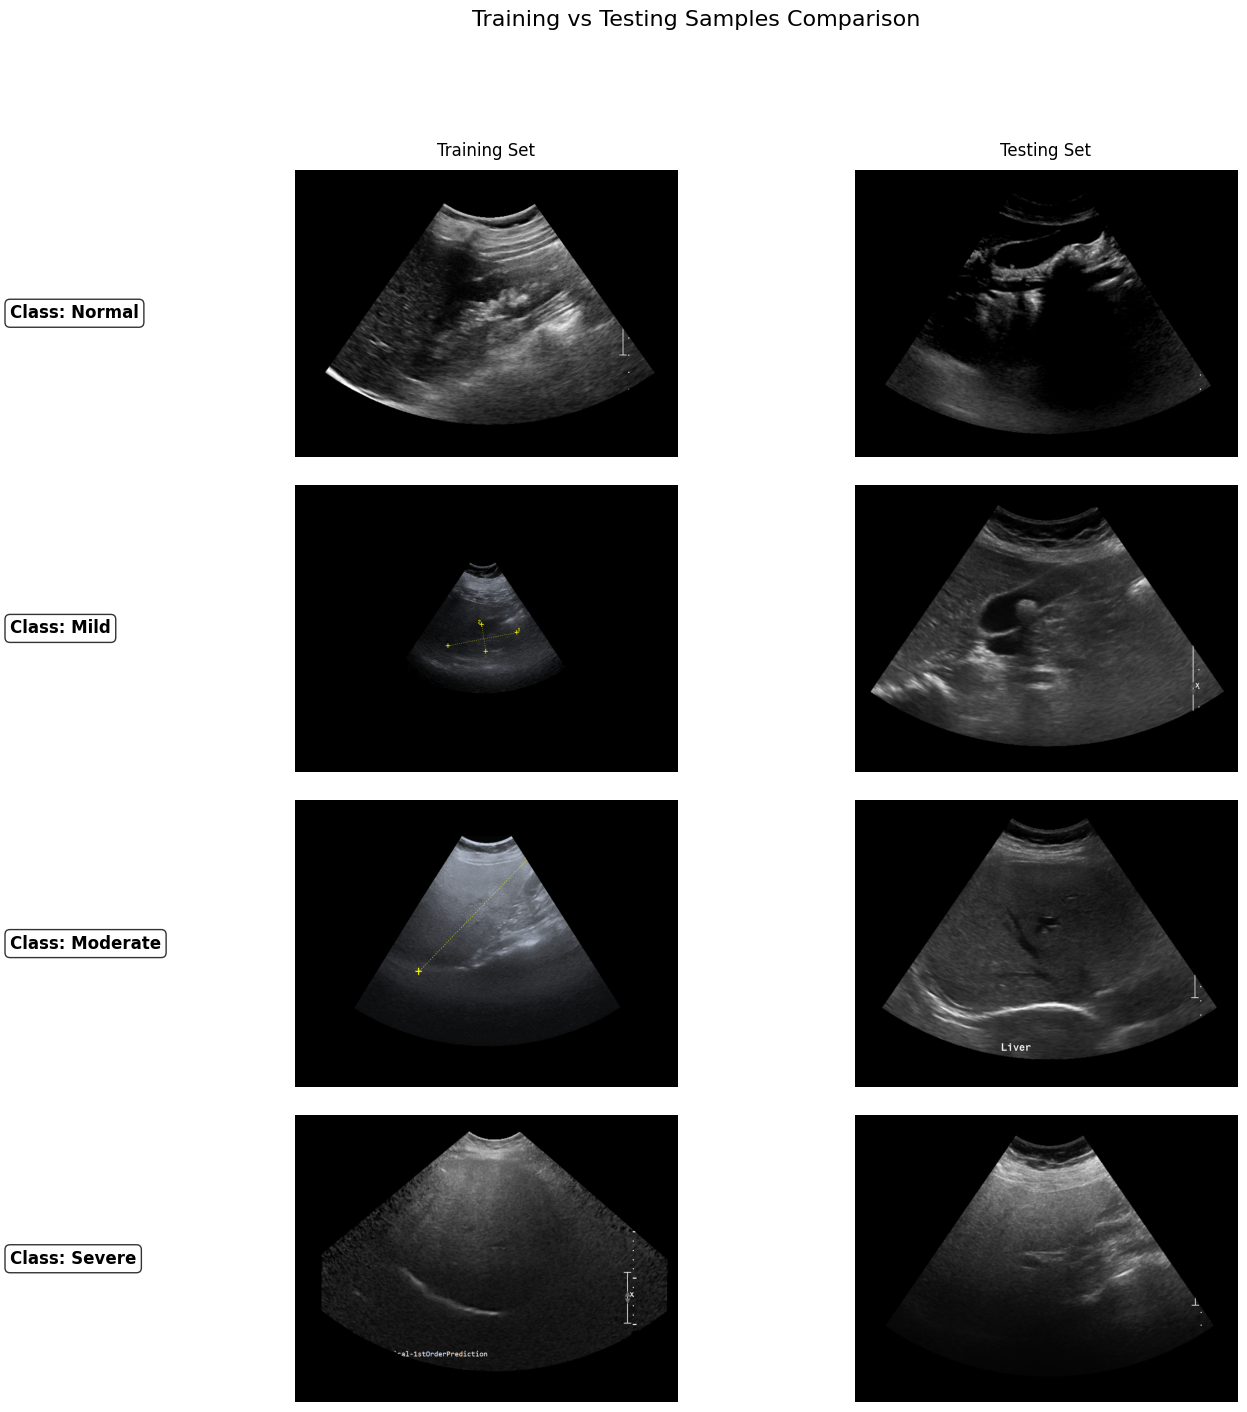

In [10]:
# Display sample images
print("\nDisplaying one random sample from each class comparing training and testing sets...")
display_train_test_comparison('.')